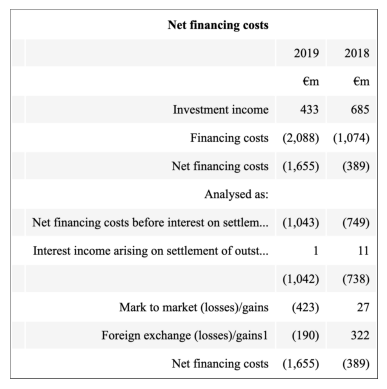

In [6]:
# open image
import matplotlib.pyplot as plt  # plt 用于显示图片
import matplotlib.image as mpimg  # mpimg 用于读取图片

img_path ='/gly/guogb/lyl/Datasets/MMTab/all_test_image/TAT-QA_02913daf-213d-46e7-bf29-a65a8e64550f.jpg'

img = mpimg.imread(img_path)  
# 放大图片分辨率
plt.axis('off')  # 不显示坐标
# 设置图片的大小
#plt.figure(figsize=(10, 10))
plt.imshow(img)  # 显示图片



In [4]:
# evaluate 
import json
import os
import time
#from tqdm import tqdm
from utils.evaluation import evaluate_tqa_tfv_one_item

log_file = "logs/20241225-192834_cot_Qwen2-VL-7B-Instruct_TQA_WTQ.jsonl"
log_file = "logs/20241218-231402_TQA_WTQ.jsonl"
# 读取日志文件到list
samples = []
with open(log_file, 'r') as f:
    for line in f:
        samples.append(json.loads(line))

print("Total samples: ", len(samples))

# 提取前x个样本进行评估
#samples = samples[0:500]

correct = 0
total = len(samples)

for i, sample in enumerate(samples):
    if sample["is_correct"]:
        correct += 1

print("Correct: ", correct)
print("Total: ", total)
print("Accuracy: ", correct / total)

Total samples:  3916
Correct:  1913
Total:  3916
Accuracy:  0.48850868232890704


In [10]:
log_file = "logs/20241226-165358_correct_Qwen2-VL-7B-Instruct_TQA_HiTab.jsonl"
log_file = "logs/20241218-231402_TQA_WTQ.jsonl"

# 读取日志文件到list
samples = []
with open(log_file, 'r') as f:
    for line in f:
        samples.append(json.loads(line))
print(samples)

#samples = samples[0:500]

task_type = "TQA" 
ans1_correct_count = 0
ans2_correct_count = 0
at_least_one_correct_count = 0
flip_correct_count = 0
flip_incorrect_count = 0

total_count = 0

for sample in samples:

    answer = sample["output"]
    is_correct,_ = evaluate_tqa_tfv_one_item(answer, sample["label"], task_type)
    
    # # at least one of the answers is correct
    # at_least_one_correct = is_correct or is_correct2
    
    if is_correct:
        ans1_correct_count += 1
    # if is_correct2:
    #     ans2_correct_count += 1
    # if at_least_one_correct:
    #     at_least_one_correct_count += 1
    # if is_correct and not is_correct2:
    #     flip_correct_count += 1
    # if not is_correct and is_correct2:
    #     flip_incorrect_count += 1
        
    total_count += 1
    
print("Answer correct count: ", ans1_correct_count)
# print("Answer 2 correct count: ", ans2_correct_count)
# print("At least one correct count: ", at_least_one_correct_count)
# print("Flip correct count: ", flip_correct_count)
# print("Flip incorrect count: ", flip_incorrect_count)
print("Total count: ", total_count)

print("Answer 1 correct rate: ", ans1_correct_count / total_count)
# print("Answer 2 correct rate: ", ans2_correct_count / total_count)
# print("At least one correct rate: ", at_least_one_correct_count / total_count)
# print("Flip correct rate: ", flip_correct_count / total_count)
# print("Flip incorrect rate: ", flip_incorrect_count / total_count)


    

[{'item_id': 'WTQ_nu-0', 'image': 'WTQ_203-csv_733', 'original_query': 'which country had the most cyclists finish within the top 10?', 'output': '{"answer": ["Spain"]}', 'output2': '{"answer": ["Spain"]}', 'label': ['Italy'], 'is_correct': False}, {'item_id': 'WTQ_nu-1', 'image': 'WTQ_204-csv_149', 'original_query': 'how many people were murdered in 1940/41?', 'output': '{"answer": ["100,000"]}', 'output2': '{"answer": ["100,000"]}', 'label': ['100,000'], 'is_correct': True}, {'item_id': 'WTQ_nu-2', 'image': 'WTQ_203-csv_435', 'original_query': 'how long did it take for the new york americans to win the national cup after 1936?', 'output': '{"answer": ["17 seasons"]}', 'output2': '{"answer": ["17 seasons"]}', 'label': ['17 years'], 'is_correct': False}, {'item_id': 'WTQ_nu-3', 'image': 'WTQ_204-csv_803', 'original_query': "alfie's birthday party aired on january 19. what was the airdate of the next episode?", 'output': '{"answer": ["January 19, 1995"]}', 'output2': '{"answer": ["Janua

In [3]:
# fact verification
import json
import os
import time
#from tqdm import tqdm
from utils.evaluation import evaluate_tqa_tfv_one_item

log_file = "logs/20241227-110650_correct_Qwen2-VL-7B-Instruct_TFV_TabFact.jsonl"
log_file = "logs/20241218-231402_TQA_WTQ.jsonl"

# 读取日志文件到list
samples = []
with open(log_file, 'r') as f:
    for line in f:
        samples.append(json.loads(line))
print(samples[0])

#samples = samples[0:500]

task_type = "TQA" 
ans1_correct_count = 0
ans2_correct_count = 0
at_least_one_correct_count = 0
flip_correct_count = 0
flip_incorrect_count = 0

total_count = 0

for sample in samples:

    answer = sample["output"]
    is_correct,_ = evaluate_tqa_tfv_one_item(answer, sample["label"], task_type)
    if "output2" in sample:
        answer2 = sample["output2"]
        is_correct2,_ = evaluate_tqa_tfv_one_item(answer2, sample["label"], task_type)
        
        # at least one of the answers is correct
        at_least_one_correct = is_correct or is_correct2
    
    if is_correct:
        ans1_correct_count += 1
    if is_correct2:
        ans2_correct_count += 1
    if at_least_one_correct:
        at_least_one_correct_count += 1
    if is_correct and not is_correct2:
        flip_correct_count += 1
    if not is_correct and is_correct2:
        flip_incorrect_count += 1
        
    total_count += 1
    
print("Answer 1 correct count: ", ans1_correct_count)
print("Answer 2 correct count: ", ans2_correct_count)
print("At least one correct count: ", at_least_one_correct_count)
print("Flip correct count: ", flip_correct_count)
print("Flip incorrect count: ", flip_incorrect_count)
print("Total count: ", total_count)

print("Answer 1 correct rate: ", ans1_correct_count / total_count)
print("Answer 2 correct rate: ", ans2_correct_count / total_count)
print("At least one correct rate: ", at_least_one_correct_count / total_count)
print("Flip correct rate: ", flip_correct_count / total_count)
print("Flip incorrect rate: ", flip_incorrect_count / total_count)


    

{'item_id': 'WTQ_nu-0', 'image': 'WTQ_203-csv_733', 'original_query': 'which country had the most cyclists finish within the top 10?', 'output': '{"answer": ["Spain"]}', 'output2': '{"answer": ["Spain"]}', 'label': ['Italy'], 'is_correct': False}
Answer 1 correct count:  1802
Answer 2 correct count:  1913
At least one correct count:  1991
Flip correct count:  78
Flip incorrect count:  189
Total count:  3916
Answer 1 correct rate:  0.46016343207354443
Answer 2 correct rate:  0.48850868232890704
At least one correct rate:  0.5084269662921348
Flip correct rate:  0.019918283963227784
Flip incorrect rate:  0.0482635342185904


In [3]:
print("123")

123
